In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

In [2]:
X,y = make_circles(n_samples=100,noise=0.1,random_state=42)

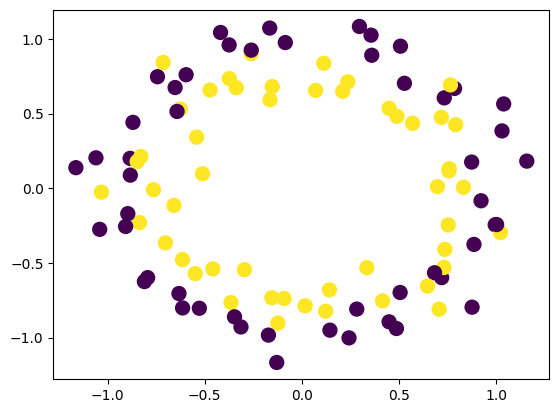

In [3]:
plt.scatter(X[:,0],X[:,1],c=y, s=100)
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = Sequential()

model.add(Dense(256,'relu', input_dim=2))
model.add(Dense(1,'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
history = model.fit(X_train,y_train,epochs=1000,validation_data=(X_test,y_test),verbose=0)

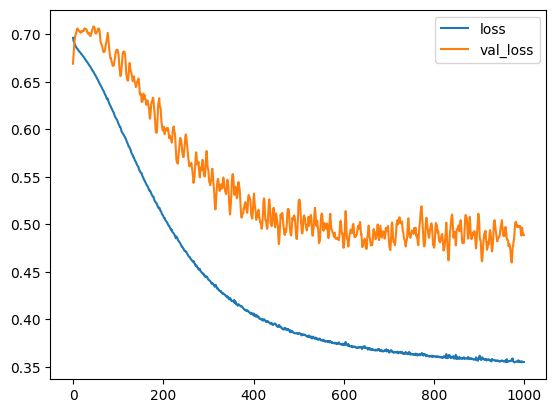

In [8]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

## Early stopping

In [18]:
model3 = Sequential()

model3.add(Dense(256,'relu', input_dim=2))
model3.add(Dense(1,'sigmoid'))

model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

history3 = model3.fit(X_train,y_train,epochs=1000,validation_data=(X_test,y_test), callbacks=[early_stopping])

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.4766 - loss: 0.6954 - val_accuracy: 0.4500 - val_loss: 0.7016
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5602 - loss: 0.6921 - val_accuracy: 0.3000 - val_loss: 0.7048
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5797 - loss: 0.6900 - val_accuracy: 0.3000 - val_loss: 0.7066
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5797 - loss: 0.6897 - val_accuracy: 0.3000 - val_loss: 0.7073
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5211 - loss: 0.6930 - val_accuracy: 0.3000 - val_loss: 0.7065
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5562 - loss: 0.6889 - val_accuracy: 0.3000 - val_loss: 0.7082
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5445 - loss: 0.6900 - val_accuracy: 0.3000 - val_loss: 0.7097
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5680 - loss: 0.6871 - val_accuracy: 0.3000 - 

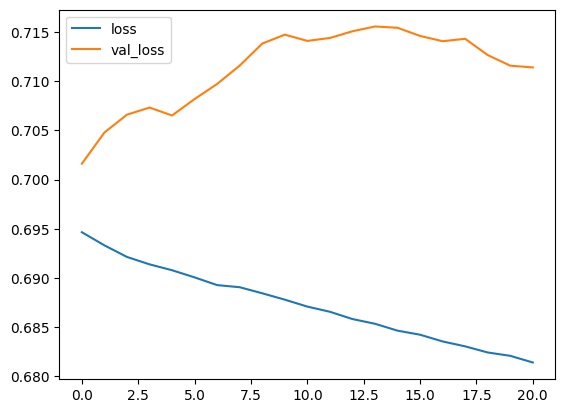

In [20]:
plt.plot(history3.history['loss'], label='loss')
plt.plot(history3.history['val_loss'], label='val_loss')
plt.legend()
plt.show()